# Enactus DCU Timelog Report
The Enactus DCU Timelog found at enactusdcu-timelog.com is used by members to track their time spent on Enactus activities including events, meetings, project development and research. This data has been cleaned, analysed and visualised. This notebook performs this work. The following notebook presents a summary of the results.

This report sets out to answer the following questions:

1. What activities have members spent the most time on?
2. How has timelogging changed across the college semester?
3. What members have logged the most?

In [1]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import calendar
%matplotlib inline

In [2]:
df = pd.read_pickle('../data/clean.pkl')

In [3]:
# Setting Parking Style
def set_parking_protect_style():
    sns.set_style('white')
    plt.rcParams['axes.spines.right'] = False
    plt.rcParams['axes.spines.top'] = False
    plt.rcParams['patch.edgecolor'] = 'white'

set_parking_protect_style()

# Create a colour palette for visualisations
parking_protect_palette = ['#5b87c6', '#174484', '#9cb7dc', '#8ce9ee']

## What Activities have members spent the most time on?
Overall Development and Meetings have received the most attention with over

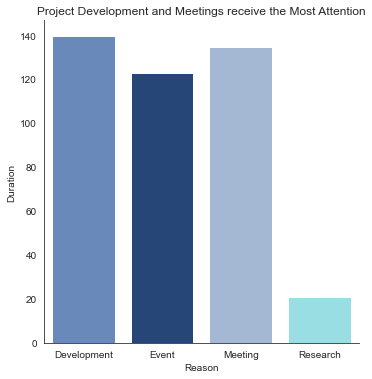

In [4]:
df_agg = (df.groupby('Reason')['Duration'].sum() / 60).reset_index()
sns.catplot(data=df_agg, x='Reason', y='Duration', kind='bar', palette=parking_protect_palette);
plt.title('Project Development and Meetings receive the Most Attention');

## How Has Tracking Changed Over the College Semester?
- Tracking has fluactuated over the semester with a gradual decrease from the beginning of the semester but a revival after reading week in Week 9.

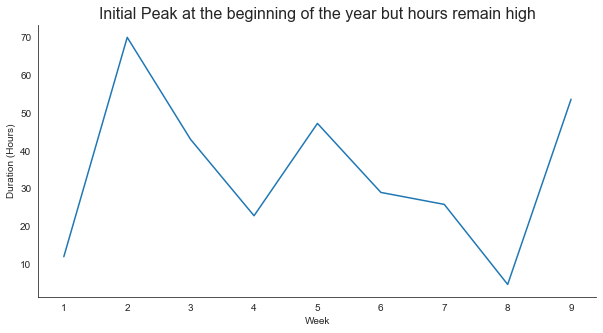

In [5]:
x = 'Week'
y = 'Duration'
df_agg = (df.loc[df['Week'] > 0].groupby(x)[y].sum() / 60).reset_index()
ax, fig = plt.subplots(figsize=(10, 5))
x = sns.lineplot(data=df_agg, x=x, y=y)
plt.ylabel('Duration (Hours)')
plt.title('Initial Peak at the beginning of the year but hours remain high', size=16)
plt.xticks(list(range(1, 10)));

## What Members have Logged the Most?
- Kevin has logged the most with over 175 hours across the semester.
- Niamh has logged nearly 100 hours in total
- Alethea, Malavika and Diarmuid are the remaining members in the top five loggers

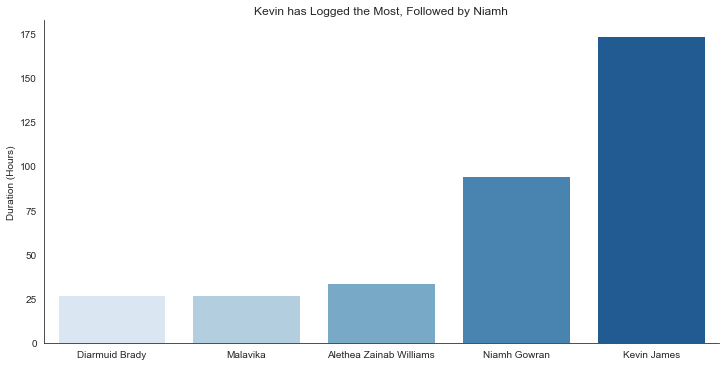

In [6]:
x = 'Name'
y = 'Duration'
top_five = df.groupby(x, as_index=False)[y].sum().sort_values(y, ascending=False).Name[:5].to_list()
df_agg = (df.loc[df.Name.isin(top_five)].groupby(x)[y].sum() / 60).reset_index().sort_values(y)
sns.catplot(data=df_agg, x=x, y=y, kind='bar', aspect=2, palette='Blues')
plt.title('Kevin has Logged the Most, Followed by Niamh')
plt.xlabel('')
plt.ylabel('Duration (Hours)');

In [8]:
# remove_cell
!jupyter nbconvert --to html --no-input 02_Timelog_Report.ipynb --output-dir="./../deliverables" --output='Timelog_Report.html' --TagRemovePreprocessor.remove_cell_tags='{"remove_cell"}'

C:\Users\Diarmuid\anaconda3\lib\site-packages\traitlets\traitlets.py:2196: FutureWarning: Supporting extra quotes around Unicode is deprecated in traitlets 5.0. Use 'Timelog_Report.html' instead of "'Timelog_Report.html'" – or use CUnicode.
  warn(
C:\Users\Diarmuid\anaconda3\lib\site-packages\traitlets\traitlets.py:2196: FutureWarning: Supporting extra quotes around Unicode is deprecated in traitlets 5.0. Use 'remove_cell' instead of "'remove_cell'" – or use CUnicode.
  warn(
[NbConvertApp] Converting notebook 02_Timelog_Report.ipynb to html
[NbConvertApp] Writing 642707 bytes to ..\deliverables\Timelog_Report.html
